# Qualidade do café com Fuzzy

Instalando a blibioteca responsável pela lógica Fuzzy


In [ ]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 40.1 MB/s eta 0:00:00


Adicionando as blibiotecas ao programa

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Parâmetros escolhidos para medir a qualidade de um bom café
 - Quantidade de pó de cadé;
 - Quantidade de açúcar.


In [ ]:
# Variáveis de entrada
po_de_cafe = ctrl.Antecedent(np.arange(0, 101, 1), 'po')
acucar = ctrl.Antecedent(np.arange(0, 11, 1), 'acucar')

# Variável de saída
qualidade = ctrl.Consequent(np.arange(0, 11, 1), 'qualidade')

Um bom café deve ter uma quantidade equilibrada entre a quantidade de pó de café e a quantidade de açúcar em que usamos para a sua confecção. Pensando nisso, vamos implementar qual seria essa quantidade em um exemplo trivial.

In [ ]:
# Funções de pertinência para pó de café
po_de_cafe['baixa'] = fuzz.trapmf(po_de_cafe.universe, [0, 0, 20, 40])
po_de_cafe['média'] = fuzz.trimf(po_de_cafe.universe, [20, 40, 60])
po_de_cafe['alta'] = fuzz.trimf(po_de_cafe.universe, [40, 60, 80])
po_de_cafe['muito_alta'] = fuzz.trapmf(po_de_cafe.universe, [60, 80, 100, 100])

# Funções de pertinência para açúcar
acucar['nenhum'] = fuzz.trimf(acucar.universe, [0, 0, 2])
acucar['pouco'] = fuzz.trimf(acucar.universe, [0, 2, 6])
acucar['médio'] = fuzz.trimf(acucar.universe, [2, 6, 8])
acucar['muito'] = fuzz.trimf(acucar.universe, [6, 10, 10])

# Funções de pertinência para qualidade
qualidade['ruim'] = fuzz.trapmf(qualidade.universe, [0, 0, 2, 4])
qualidade['regular'] = fuzz.trimf(qualidade.universe, [2, 4, 6])
qualidade['bom'] = fuzz.trimf(qualidade.universe, [4, 6, 8])
qualidade['excelente'] = fuzz.trapmf(qualidade.universe, [6, 8, 10, 10])

## Qual café, é um bom café?

Diante de pesquisa feita com a minha pessoa apenas, um bom café é aquele que possuí uma quantidade alta de pó de café e uma quantidade alta de açúcar.

Observação: não sou um apreciador de café.

In [ ]:
# Regras sobre a qualidade
regra1 = ctrl.Rule(po_de_cafe['baixa'] & acucar['pouco'], qualidade['ruim'])
regra2 = ctrl.Rule(po_de_cafe['baixa'] & acucar['médio'], qualidade['ruim'])
regra3 = ctrl.Rule(po_de_cafe['baixa'] & acucar['muito'], qualidade['ruim'])
regra4 = ctrl.Rule(po_de_cafe['média'] & acucar['pouco'], qualidade['regular'])
regra5 = ctrl.Rule(po_de_cafe['média'] & acucar['médio'], qualidade['regular'])
regra6 = ctrl.Rule(po_de_cafe['média'] & acucar['muito'], qualidade['regular'])
regra7 = ctrl.Rule(po_de_cafe['alta'] & acucar['pouco'], qualidade['ruim'])
regra8 = ctrl.Rule(po_de_cafe['alta'] & acucar['médio'], qualidade['regular'])
regra9 = ctrl.Rule(po_de_cafe['alta'] & acucar['muito'], qualidade['excelente'])
regra10 = ctrl.Rule(po_de_cafe['muito_alta'] & acucar['pouco'], qualidade['regular'])
regra11 = ctrl.Rule(po_de_cafe['muito_alta'] & acucar['médio'], qualidade['bom'])
regra12 = ctrl.Rule(po_de_cafe['muito_alta'] & acucar['muito'], qualidade['excelente'])

### Adicionando controle do sistema

Criada as regras, basta então adicionar elas ao programa.

In [ ]:
# Adicionando as regras como controle do sistema
sistema = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12])

## Criando simulação

In [ ]:
# Adicionando controle de sistema a uma simulação
simulador = ctrl.ControlSystemSimulation(sistema)

# Simulando
simulador.input['po'] = 90
simulador.input['acucar'] = 10
simulador.compute()
print(simulador.output['qualidade'])

8.444444444444445


### Plotando resultados

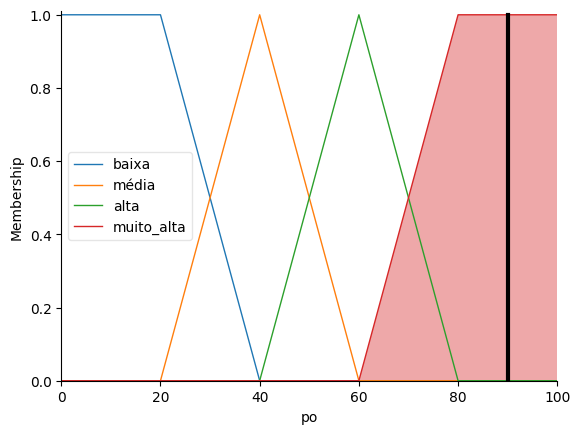

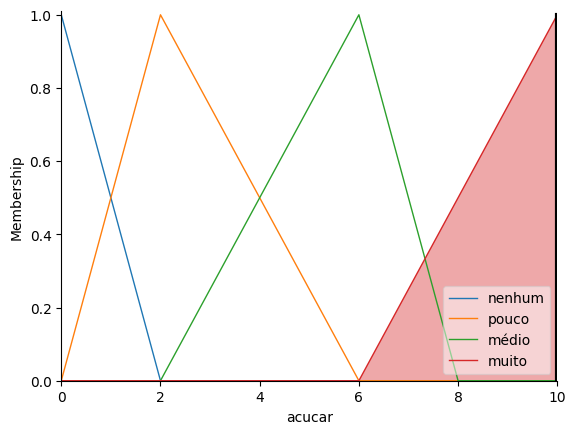

In [ ]:
# Plotando os gráficos das funções de pertinência e do resultado
po_de_cafe.view(simulador)
acucar.view(simulador)

### Plotando a qualidade

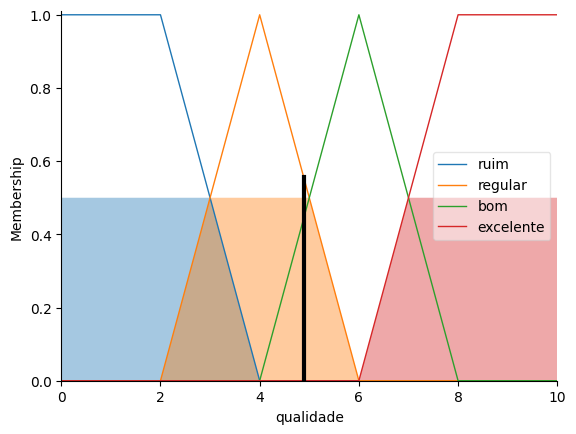

In [ ]:
qualidade.view(simulador)